Step 1: Install necessary libraries and explore the dataset

In [1]:
# install these libraries
# conda install numpy
# conda install pandas
# conda install matplotlib
# conda install seaborn

In [2]:
# importing necessary libraries
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# loading dataset

# this gives a warning and later an error
# df = pd.read_csv('AllMoviesDetailsCleaned.csv', encoding='utf-8-sig', sep=";",
#                  engine="python", parse_dates=["release_date"])

# this will also give an error later: 
# time data "1896-04-01" doesn't match format "%d/%m/%Y", at position 12801.
# df = pd.read_csv('AllMoviesDetailsCleaned.csv', encoding='utf-8-sig', sep=";",
#                  engine="python", parse_dates=["release_date"], dayfirst="True") 


# 'release_date' column has no fixed date format
df = pd.read_csv('AllMoviesDetailsCleaned.csv', encoding='utf-8-sig', sep=";",
                 engine="python", parse_dates=["release_date"], date_format="mixed")

In [3]:
# initial shape 
df.shape

(329044, 22)

In [4]:
# we can see that date is in %d/%m/%Y format
# later we got error: time data "1896-04-01" doesn't match format "%d/%m/%Y", at position 12801
df['release_date']

0        1988-10-21
1        1986-10-16
2        1995-12-25
3        1993-10-15
4        2006-01-01
            ...    
329039   2016-01-21
329040   2006-11-24
329041   2017-02-08
329042   2016-10-11
329043   2017-06-30
Name: release_date, Length: 329044, dtype: datetime64[ns]

In [5]:
# first ten rows
df.head(10)

,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number
0,2,0,Drama|Crime,tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,0.823904,Villealfa Filmproduction Oy,Finland,...,69.0,suomi,Released,NaN,Ariel,7.1,40,2,1,2
1,3,0,Drama|Comedy,tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",0.47445,Villealfa Filmproduction Oy,Finland,...,76.0,English,Released,NaN,Shadows in Paradise,7.0,32,1,1,3
2,5,4000000,Crime|Comedy,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,1.698,Miramax Films,United States of America,...,98.0,English,Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,6.5,485,2,1,1
3,6,0,Action|Thriller|Crime,tt0107286,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",1.32287,Universal Pictures,Japan,...,110.0,English,Released,Don't move. Don't whisper. Don't even breathe.,Judgment Night,6.5,69,3,2,1
4,8,42000,Documentary,tt0825671,en,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...,0.054716,inLoops,Austria,...,80.0,English,Released,A Megacities remix.,Life in Loops (A Megacities RMX),6.4,4,1,1,5
5,9,0,Drama,tt0425473,de,Sonntag im August,NaN,0.001647,none,Germany,...,15.0,Deutsch,Released,NaN,Sunday in August,5.3,2,0,1,1
6,11,11000000,Adventure|Action|Science Fiction,tt0076759,en,Star Wars,Princess Leia is captured and held hostage by ...,10.492614,Lucasfilm,United States of America,...,121.0,English,Released,"A long time ago in a galaxy far, far away...",Star Wars,8.0,6168,2,1,1
7,12,94000000,Animation|Family,tt0266543,en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",9.915573,Pixar Animation Studios,United States of America,...,100.0,English,Released,"There are 3.7 trillion fish in the ocean, they...",Finding Nemo,7.6,5531,1,1,1
8,13,55000000,Comedy|Drama|Romance,tt0109830,en,Forrest Gump,A man with a low IQ has accomplished great thi...,10.351236,Paramount Pictures,United States of America,...,142.0,English,Released,"The world will never be the same, once you've ...",Forrest Gump,8.2,7204,1,1,1
9,14,15000000,Drama,tt0169547,en,American Beauty,"Lester Burnham, a depressed suburban father in...",8.191009,DreamWorks SKG,United States of America,...,122.0,English,Released,Look closer.,American Beauty,7.9,2994,2,1,1


In [6]:
# last ten rows
df.tail(10)

,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number
329034,469210,0,Drama,tt0106530,es,Cautivos de la sombra,no overview,0.00015,Origen Producciones Cinematograficas S.A.,Spain,...,90.0,Español,Released,NaN,Wild Boys,0.0,0,3,1,1
329035,469211,0,Science Fiction,tt6451666,ja,Cocolors,"Aki isn’t a brave little boy, but he’s dedicat...",0.01455,Kamikaze Douga,Japan,...,46.0,日本語,Released,NaN,Cocolors,0.0,0,1,1,1
329036,469212,0,Documentary,NaN,pt,Ecologia,NaN,0.2,none,Brazil,...,NaN,none,Released,NaN,Ecologia,0.0,0,0,1,0
329037,469213,0,Comedy,NaN,en,The Tom Green Show: Early Exposure - Raw Meat ...,Spanked onto this program is the outrageous be...,0.0003,none,none,...,60.0,none,Released,It's not the Green Tom Show.,The Tom Green Show: Early Exposure - Raw Meat ...,0.0,0,0,0,0
329038,469214,0,NaN,NaN,en,Passengers,A spacecraft traveling to a distant colony pla...,0.1,none,none,...,0.0,none,Released,NaN,Passengers,0.0,0,0,0,0
329039,469215,0,Documentary|History|TV Movie,tt5430190,en,The Day Hitler Died,The story of Hitler’s final hours told by peop...,0.0045,History Channel,United States of America,...,46.0,Deutsch,Released,"April 30th, 1945",The Day Hitler Died,7.0,1,1,1,2
329040,469216,0,NaN,NaN,de,Mobb Deep - Life of the Infamous: The Videos,NaN,0.00045,Sony Music Entertainmant,United States of America,...,NaN,English,Released,NaN,Mobb Deep - Life of the Infamous: The Videos,9.0,1,1,1,1
329041,469217,0,Drama|Comedy,NaN,en,#idiot,"In the modern day pursuit of fame and fortune,...",1.37217,none,Malaysia,...,11.0,English,Released,NaN,#idiot,0.0,0,0,1,1
329042,469218,0,Drama|Comedy,tt6391664,en,Conspiracy P.I.E,Director Levi A. Taylor invites you on a nosta...,0.0096,none,United States of America,...,12.0,English,Released,NaN,Conspiracy P.I.E,0.0,0,0,1,1
329043,469219,0,Drama,tt6413160,en,Chance,A homeless man is given a second chance at lif...,0.0759,none,United States of America,...,90.0,English,Released,NaN,Chance,0.0,0,0,1,1


In [7]:
# statistical summary of columns containing numerical values
df.describe()

,id,budget,release_date,revenue,runtime,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number
count,329044.000000,3.290440e+05,304998,3.290440e+05,292252.000000,329044.000000,329044.000000,329044.00000,329044.000000,329044.000000
mean,252984.152937,6.129073e+05,1990-05-08 00:39:58.819664384,1.533838e+06,60.406813,2.374474,14.211270,0.59475,0.609882,0.647628
min,2.000000,0.000000e+00,1874-12-09 00:00:00,-1.200000e+01,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,124796.250000,0.000000e+00,1975-01-01 00:00:00,0.000000e+00,5.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,276473.500000,0.000000e+00,2001-09-19 00:00:00,0.000000e+00,71.000000,0.000000,0.000000,0.00000,1.000000,1.000000
75%,370839.250000,0.000000e+00,2011-06-30 00:00:00,0.000000e+00,94.000000,5.500000,1.000000,1.00000,1.000000,1.000000
max,469219.000000,6.000000e+08,2026-01-01 00:00:00,2.781506e+09,51420.000000,10.000000,12811.000000,26.00000,26.000000,25.000000
std,138633.855160,6.845307e+06,NaN,2.401891e+07,142.502210,3.126254,166.443851,1.03807,0.664861,0.672048


In [8]:
# count not null values for each column
df.count()

id                             329044
budget                         329044
genres                         207515
imdb_id                        250564
original_language              328841
original_title                 329043
overview                       278059
popularity                     329044
production_companies           329044
production_countries           329044
release_date                   304998
revenue                        329044
runtime                        292252
spoken_languages               324584
status                         327056
tagline                         52929
title                          329043
vote_average                   329044
vote_count                     329044
production_companies_number    329044
production_countries_number    329044
spoken_languages_number        329044
dtype: int64

In [9]:
# which cells are null and not null
df.isna()

,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
329040,False,False,True,True,False,False,True,False,False,False,...,True,False,False,True,False,False,False,False,False,False
329041,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
329042,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [10]:
# count null values for each column
len(df) - df.count()

id                                  0
budget                              0
genres                         121529
imdb_id                         78480
original_language                 203
original_title                      1
overview                        50985
popularity                          0
production_companies                0
production_countries                0
release_date                    24046
revenue                             0
runtime                         36792
spoken_languages                 4460
status                           1988
tagline                        276115
title                               1
vote_average                        0
vote_count                          0
production_companies_number         0
production_countries_number         0
spoken_languages_number             0
dtype: int64

Step 2: Select data of interest

In [11]:
# selecting columns of interest (these 7 columns)
df = df[["id","title","budget","genres","popularity","revenue","release_date"]]
df.shape

(329044, 7)

In [12]:
# dropping all rows where any entry/cell contains null
df = df.dropna(axis=0, how="any")
df.shape

(202471, 7)

In [13]:
'''
# genres excluding Crime/Romance
temp = df.genres
count = 1
for t in temp:
    if t.find("Crime")==-1 and t.find("Romance")==-1:
        # print(t)
        count+=1
print(count)  #170401
'''

'\n# genres excluding Crime/Romance\ntemp = df.genres\ncount = 1\nfor t in temp:\n    if t.find("Crime")==-1 and t.find("Romance")==-1:\n        # print(t)\n        count+=1\nprint(count)  #170401\n'

In [14]:
# selecting rows of interest (movies belonging to Crime/Romance genre)
df = df[df.genres.str.contains("Crime|Romance")]
df.shape

(32071, 7)

In [15]:
# converting the 'popularity' column to numeric data
df["popularity"] = pd.to_numeric(df['popularity'], errors='coerce')

# converting the 'release_date' column to datetime
df['release_date']= pd.to_datetime(df.release_date)

# extracting these two columns from the 'release_date' column
df['year']= df.release_date.dt.year
df['month']= df.release_date.dt.month

df

,id,title,budget,genres,popularity,revenue,release_date,year,month
0,2,Ariel,0,Drama|Crime,0.823904,0,1988-10-21,1988,10
2,5,Four Rooms,4000000,Crime|Comedy,1.698000,4300000,1995-12-25,1995,12
3,6,Judgment Night,0,Action|Thriller|Crime,1.322870,12136938,1993-10-15,1993,10
8,13,Forrest Gump,55000000,Comedy|Drama|Romance,10.351236,677945399,1994-06-07,1994,6
11,16,Dancer in the Dark,12800000,Drama|Crime|Music,2.106217,40031879,2000-05-17,2000,5
...,...,...,...,...,...,...,...,...,...
328817,468969,Angustia,0,Crime|Thriller,0.030130,0,1948-03-10,1948,3
328840,468992,Ниро Вульф и Арчи Гудвин: Пока я не умер,0,Mystery|Crime,0.417130,0,2001-01-01,2001,1
328894,469053,No One Believes Me,0,Crime|Drama|Mystery,0.081300,0,2013-05-14,2013,5
328942,469109,Plug Love,0,Crime|Romance|Drama,0.159900,0,2017-07-17,2017,7


In [16]:
'''
# how np.where() func works
# np.where(cond, x_if_true, y_if_false)  #x, y can be scalar or array 
temp = np.where(df.genres.str.contains("Romance"),"Romance","Other")
temp = pd.Series(temp)
print(temp.unique())  #Romance/Other

temp2 = np.where(df.genres.str.contains("Crime"), "Crime", temp)
temp2 = pd.Series(temp2)
print(temp2.unique())  #Crime/Romance

# genres excluding Crime/Romance
count = 1
for t in temp2:
    if t.find("Crime")==-1 and t.find("Romance")==-1:
        # print(t)
        count+=1
print(count)  #1
'''

'\n# how np.where() func works\n# np.where(cond, x_if_true, y_if_false)  #x, y can be scalar or array \ntemp = np.where(df.genres.str.contains("Romance"),"Romance","Other")\ntemp = pd.Series(temp)\nprint(temp.unique())  #Romance/Other\n\ntemp2 = np.where(df.genres.str.contains("Crime"), "Crime", temp)\ntemp2 = pd.Series(temp2)\nprint(temp2.unique())  #Crime/Romance\n\n# genres excluding Crime/Romance\ncount = 1\nfor t in temp2:\n    if t.find("Crime")==-1 and t.find("Romance")==-1:\n        # print(t)\n        count+=1\nprint(count)  #1\n'

In [17]:
# extracting 'type' column from 'genres' column and labelling the values as Crime/Romance

# np.where(cond, x_true, y_false)
df["type"] = np.where(df.genres.str.contains("Crime"),
                      "Crime", np.where(df.genres.str.contains("Romance"),"Romance","Other")
                      )

df

,id,title,budget,genres,popularity,revenue,release_date,year,month,type
0,2,Ariel,0,Drama|Crime,0.823904,0,1988-10-21,1988,10,Crime
2,5,Four Rooms,4000000,Crime|Comedy,1.698000,4300000,1995-12-25,1995,12,Crime
3,6,Judgment Night,0,Action|Thriller|Crime,1.322870,12136938,1993-10-15,1993,10,Crime
8,13,Forrest Gump,55000000,Comedy|Drama|Romance,10.351236,677945399,1994-06-07,1994,6,Romance
11,16,Dancer in the Dark,12800000,Drama|Crime|Music,2.106217,40031879,2000-05-17,2000,5,Crime
...,...,...,...,...,...,...,...,...,...,...
328817,468969,Angustia,0,Crime|Thriller,0.030130,0,1948-03-10,1948,3,Crime
328840,468992,Ниро Вульф и Арчи Гудвин: Пока я не умер,0,Mystery|Crime,0.417130,0,2001-01-01,2001,1,Crime
328894,469053,No One Believes Me,0,Crime|Drama|Mystery,0.081300,0,2013-05-14,2013,5,Crime
328942,469109,Plug Love,0,Crime|Romance|Drama,0.159900,0,2017-07-17,2017,7,Crime


Step 3: Creating subsets of the dataframe

In [18]:
# calculating mean popularity of each movie type in a given year

# movies are grouped by year then type, then mean popularity of each group is calculated
# group G1 contains N movies in year Y of type T1, group G2 contains M movies in year Y of type T2
# then calculate mean popularity of each group (G1, G2, ...)
data = pd.DataFrame(df.groupby(["year", "type"], sort=True)['popularity'].mean()).reset_index()
data

,year,type,popularity
0,1894,Crime,0.002960
1,1894,Romance,0.003663
2,1896,Crime,0.000307
3,1896,Romance,0.083999
4,1897,Crime,0.001740
...,...,...,...
242,2018,Romance,0.723746
243,2019,Crime,0.611379
244,2019,Romance,0.394355
245,2020,Crime,0.193050


In [19]:
# select rows where revenue is not 0
df1 = df[df.revenue!=0]

# scaling the revenue
df1["revenue"] = df1["revenue"]/1000000

df1

C:\Users\AZS\AppData\Local\Temp\ipykernel_2828\3920333232.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["revenue"] = df1["revenue"]/1000000


,id,title,budget,genres,popularity,revenue,release_date,year,month,type
2,5,Four Rooms,4000000,Crime|Comedy,1.698000,4.300000,1995-12-25,1995,12,Crime
3,6,Judgment Night,0,Action|Thriller|Crime,1.322870,12.136938,1993-10-15,1993,10,Crime
8,13,Forrest Gump,55000000,Comedy|Drama|Romance,10.351236,677.945399,1994-06-07,1994,6,Romance
11,16,Dancer in the Dark,12800000,Drama|Crime|Music,2.106217,40.031879,2000-05-17,2000,5,Crime
15,20,My Life Without Me,0,Drama|Romance,0.911462,9.726954,2003-07-03,2003,7,Romance
...,...,...,...,...,...,...,...,...,...,...
320928,459674,DiDi's Dreams,0,Romance|Comedy|Fantasy,0.166830,0.002748,2017-05-27,2017,5,Romance
323980,463213,Gelb ist nicht nur die Farbe der Sonn,50000,Crime|Thriller|TV Movie,0.000000,0.050000,1979-06-24,1979,6,Crime
327282,467210,Futbolín,22000000,Action|Animation|Adventure|Family|Romance,0.107976,25.100000,2013-07-18,2013,7,Romance
328547,468656,3 Braves: The Revenge of Baba Balaam,0,Action|Adventure|Animation|Comedy|Crime|Family...,0.096195,0.640691,2016-12-15,2016,12,Crime


In [20]:
# calculating mean revenue of each movie type in a given year

# movies are grouped by year then type, then mean revenue of each group is calculated
# group G1 contains N movies in year Y of type T1, group G2 contains M movies in year Y of type T2
# then calculate mean revenue of each group (G1, G2, ...)
data1 = pd.DataFrame(df1.groupby(["year", "type"], sort=True)['revenue'].mean()).reset_index()
data1

,year,type,revenue
0,1915,Romance,11.000000
1,1925,Crime,0.704000
2,1925,Romance,11.000001
3,1926,Romance,0.658000
4,1927,Romance,1.027757
...,...,...,...
157,2015,Romance,36.420234
158,2016,Crime,76.986202
159,2016,Romance,82.495365
160,2017,Crime,199.443251


In [21]:
# select rows where budget is not 0
df2= df[df.budget!=0] 

# scaling the budget
df2["budget"] = df2["budget"]/1000000

df2

C:\Users\AZS\AppData\Local\Temp\ipykernel_2828\2939241119.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["budget"] = df2["budget"]/1000000


,id,title,budget,genres,popularity,revenue,release_date,year,month,type
2,5,Four Rooms,4.000000,Crime|Comedy,1.698000,4300000,1995-12-25,1995,12,Crime
8,13,Forrest Gump,55.000000,Comedy|Drama|Romance,10.351236,677945399,1994-06-07,1994,6,Romance
11,16,Dancer in the Dark,12.800000,Drama|Crime|Music,2.106217,40031879,2000-05-17,2000,5,Crime
18,24,Kill Bill: Vol. 1,30.000000,Action|Crime,7.891837,180949000,2003-10-10,2003,10,Crime
21,27,9 Songs,1.000000,Drama|Music|Romance,2.939728,1574623,2004-07-16,2004,7,Romance
...,...,...,...,...,...,...,...,...,...,...
327282,467210,Futbolín,22.000000,Action|Animation|Adventure|Family|Romance,0.107976,25100000,2013-07-18,2013,7,Romance
327670,467653,Catching the Black Widow,2.039843,Crime|Drama,1.027356,0,2017-07-30,2017,7,Crime
327859,467874,The Young Lady,0.003000,Crime|Comedy,0.005201,0,2016-03-21,2016,3,Crime
328594,468707,Lauri Mäntyvaaran tuuheet ripset,1.254040,Romance|Comedy,0.519317,0,2017-07-28,2017,7,Romance


In [22]:
# calculating mean budget of each movie type in a given year

# movies are grouped by year then type, then mean budget of each group is calculated
# group G1 contains N movies in year Y of type T1, group G2 contains M movies in year Y of type T2
# then calculate mean budget of each group (G1, G2, ...)
data2 = pd.DataFrame(df2.groupby(["year", "type"], sort=True)['budget'].mean()).reset_index()
data2

,year,type,budget
0,1915,Romance,0.110000
1,1919,Crime,0.350000
2,1919,Romance,0.000042
3,1920,Crime,0.053500
4,1922,Crime,0.000005
...,...,...,...
178,2016,Crime,13.709117
179,2016,Romance,11.047228
180,2017,Crime,21.652623
181,2017,Romance,13.119661


In [23]:
# calculating total number of movies of each movie type in a given year

# movies are grouped by year then type, then sum of each group is calculated
# group G1 contains N movies in year Y of type T1, group G2 contains M movies in year Y of type T2
# then calculate sum of each group (G1, G2, ...)
data3 = pd.DataFrame(df.groupby(["year", "type"], sort=True)['id'].count()).reset_index()
data3

,year,type,id
0,1894,Crime,1
1,1894,Romance,1
2,1896,Crime,3
3,1896,Romance,2
4,1897,Crime,5
...,...,...,...
242,2018,Romance,11
243,2019,Crime,6
244,2019,Romance,4
245,2020,Crime,3


Step 4: Generating graphs

In [24]:
# enlarges image area in browser
from IPython.display import display, HTML
CSS = """div.output_area img {max-width:None !important;max-height: None !important";}"""
display(HTML('<style>{}</style>'.format(CSS)))

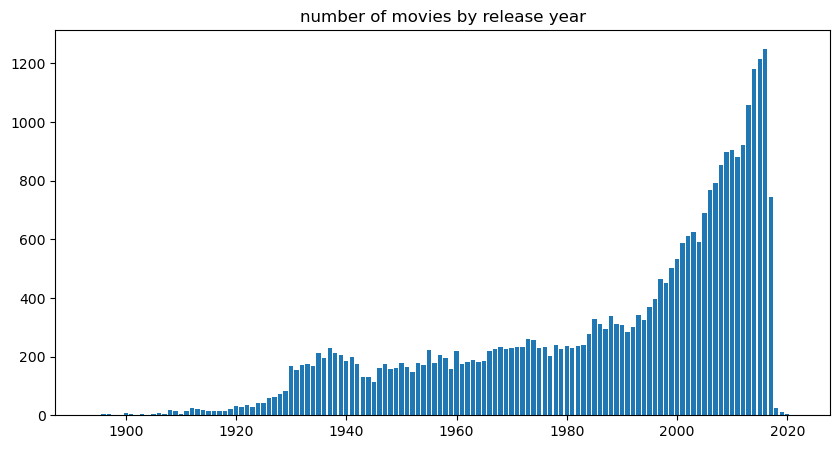

In [25]:
# bar plot - number of movies by release year

# generate a series of release years from 'release_date' column
# lambda func substitutes each dates from 'release_date' column to years
release_years = df["release_date"].map(lambda x: x.year)

# generate a series of movies per release year
# the values in 'id' column are grouped by year and each group is then summed
movies_per_release_year = df["id"].groupby(pd.Index(release_years)).count()

# plot the graph
plt.figure(figsize=(10, 5))
plt.bar(movies_per_release_year.index, movies_per_release_year)
plt.title("number of movies by release year")
plt.show()

C:\Users\AZS\AppData\Local\Temp\ipykernel_2828\4116589518.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="center")  # x-axis tick labels


[Text(0.5, 0, 'year'),
 Text(0, 0.5, 'Released Movies'),
 Text(0.5, 1.0, 'Movie Count By Year')]

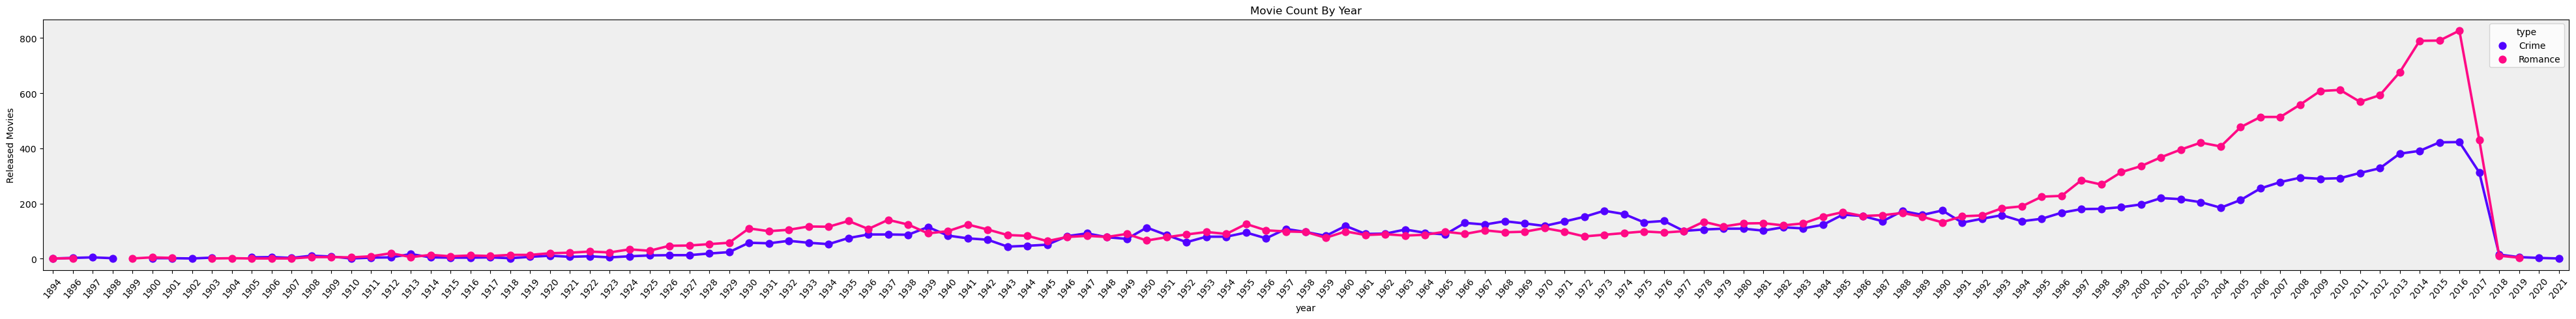

In [26]:
# point plot - number of Crime movies vs. Romance movies by release year
# data3 - total number of movies of each movie type (Crime/Romance) in a given year

# configure the figure and axes for the plot
fig, ax = plt.subplots()  # create figure and axes
ax.patch.set_facecolor('#EFEFEF')  # axes face color
plt.rcParams['figure.facecolor'] = 'black'  # figure face color
fig.set_size_inches(50, 5)  # figure size
# configure x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="center")

# configure the seaborn point plot
sns.pointplot(data=data3, x=data3["year"], y=data3["id"], hue=data3["type"],
              join=True, palette={"Crime": "#5202FF", "Romance": "#FF0A85"}, ax=ax) 

# configure the matplotlib axes
ax.set(xlabel='year', ylabel='Released Movies', title="Movie Count By Year")

In [53]:
# seperating data in diff data frames based on movie types
# data3 - total number of movies of each movie type (Crime/Romance) in a given year

unique_types = data3.type.unique()

#create an empty data frame dictionary to store your data frames
DataFrameDict = {elem : pd.DataFrame for elem in unique_types}

# seperate
for key in DataFrameDict.keys():
    DataFrameDict[key] = data3[:][data3.type==key]
    
crime = 0
romance = 0
if DataFrameDict['Crime'].id.sum(axis=0, skipna=True)>DataFrameDict['Romance'].id.sum(axis=0, skipna=True):
    print('winner genre is crime based on released movies')
    crime+=1
else: 
    print('winner genre is romance based on released movies')
    romance+=1

winner genre is romance based on released movies
